In [1]:
# Code to do various filtering and adding features
# output file will be "recent_tracks.csv"

In [2]:
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil.parser as parser

from datetime import datetime

SPRING='SPRING'
SUMMER='SUMMER'
AUTUMN='AUTUMN'
WINTER='WINTER'

SEASONS = [SPRING, SUMMER, AUTUMN, WINTER]

In [3]:
try:
    artists_df = pd.read_csv("./artists.csv")
    charts_df = pd.read_csv("./charts.csv")
    tracks_df = pd.read_csv("./tracks.csv")
except:
    pass

In [12]:
month_to_season_map = {
    1: WINTER,
    2: WINTER,
    3: SPRING,
    4: SPRING,
    5: SPRING,
    6: SUMMER,
    7: SUMMER,
    8: SUMMER,
    9: AUTUMN,
    10: AUTUMN,
    11: AUTUMN,
    12: WINTER,
}

# takes in dataframe, looks at the release date, adds the following columns:
# year (int)
# 
# def parse_date(df):
def parse_year(row):
    try:
        release_date = row['release_date']
        parsed_datetime = parser.parse(release_date)
        return parsed_datetime.year
    except:
        return null

def parse_season(row):
    try:
        release_date = row['release_date']
        parsed_datetime = parser.parse(release_date)
        month = parsed_datetime.month
        return month_to_season_map[month]
    except:
        return null

In [13]:
# attach the year, as well as the season
tracks_df['year'] = tracks_df.apply(parse_year, axis=1)

In [14]:
# we only want songs released between 2017 and 2020 (inclusive of 2020)
recent_tracks = tracks_df.loc[tracks_df['year'] >= 2017]

In [15]:
recent_tracks = recent_tracks.loc[recent_tracks['year'] <= 2020]

In [19]:
# attach the season to the data
recent_tracks['season'] = recent_tracks.apply(parse_season, axis=1)

In [22]:
# write to recent_tracks.csv
recent_tracks.to_csv("recent_tracks.csv")

In [52]:
continuous_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
discrete_features = ['popularity', 'explicit', 'key', 'mode', 'time_signature', 'season']

In [55]:
recent_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,season
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.8670,...,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,2020,SPRING
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.2010,...,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,2018,SPRING
39533,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.1290,...,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,2018,SPRING
39581,55qyghODi24yaDgKBI6lx0,"The Circle Game - Live at The 2nd Fret, Philad...",18,313093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.644,0.2120,...,1,0.0347,0.881,0.000022,0.7980,0.4410,117.072,3,2020,AUTUMN
39583,00xemFYjQNRpOlPhVaLAHa,"Urge For Going - Live at The 2nd Fret, Philade...",18,295093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.627,0.1840,...,1,0.0450,0.955,0.000162,0.0986,0.2990,115.864,4,2020,AUTUMN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,0.562,0.0331,...,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,2020,SPRING
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,106002,0,['Emilie Chin'],['4USdOnfLczwUglA3TrdHs2'],2020-02-08,0.626,0.5300,...,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,4,2020,WINTER
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020,AUTUMN
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020,AUTUMN


In [35]:
# for feature in continuous_features:
#     plt.figure(figsize=(10, 6))
#     plt.title(feature, fontdict={'fontsize': 15})
#     plt.boxplot(recent_tracks['energy'])

In [53]:
recent_tracks_z_scores = pd.DataFrame()
for discrete_feature in discrete_features:
    recent_tracks_z_scores[discrete_feature] = recent_tracks[discrete_feature]
for cont_feature in continuous_features:
    recent_tracks_z_scores[cont_feature + "_z"] = (recent_tracks[cont_feature] - recent_tracks[cont_feature].mean())/recent_tracks[cont_feature].std(ddof=0)

In [54]:
recent_tracks_z_scores

,popularity,explicit,key,mode,time_signature,season,duration_ms_z,danceability_z,energy_z,loudness_z,acousticness_z,instrumentalness_z,liveness_z,valence_z,tempo_z
39511,41,0,2,1,4,SPRING,-0.476679,0.175446,1.080353,1.242533,0.556632,-0.377667,-0.334660,1.436296,-0.042043
39529,26,0,7,1,3,SPRING,-0.244711,-2.040092,-2.178209,-2.745676,2.170121,-0.377667,4.230575,-1.060388,-0.164790
39533,25,0,7,0,3,SPRING,0.168451,-2.354799,-2.530486,-2.843994,2.352578,-0.377648,2.911729,-1.389118,-1.373546
39581,18,0,11,1,3,AUTUMN,0.805672,0.005504,-2.124389,-1.773600,2.148656,-0.377580,3.598006,-0.219838,-0.167602
39583,18,0,1,1,4,AUTUMN,0.655331,-0.101497,-2.261385,-2.147577,2.413397,-0.377033,-0.575753,-0.810720,-0.209535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586665,66,0,1,1,3,SPRING,-0.262109,-0.510616,-2.999699,-4.795282,2.560077,3.382863,-0.501754,-0.448700,-2.020466
586666,4,0,5,0,4,WINTER,-0.924010,-0.107791,-0.568499,-1.509041,-0.598926,2.971983,-0.543527,-1.160255,-0.062038
586667,50,0,0,0,4,AUTUMN,0.347750,-0.523204,-0.627212,-0.016832,1.805208,-0.377667,-0.777458,-1.176900,0.346990
586668,72,0,0,1,4,AUTUMN,-0.529022,0.767095,0.082235,0.577303,-0.498754,-0.376505,-0.612752,0.799642,0.978601


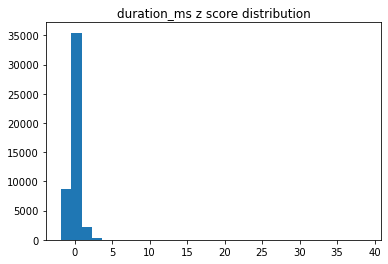

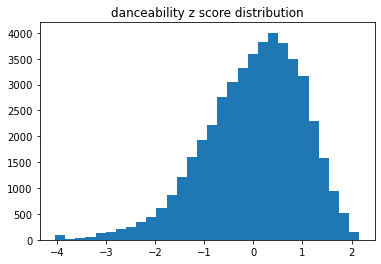

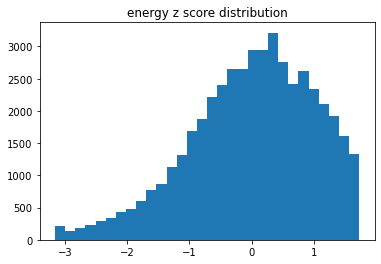

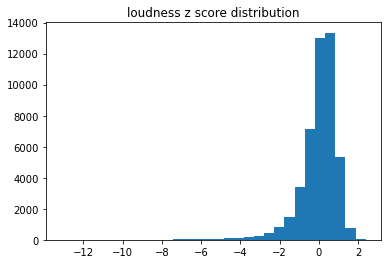

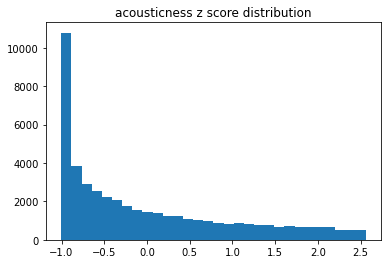

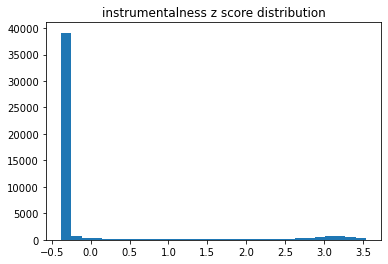

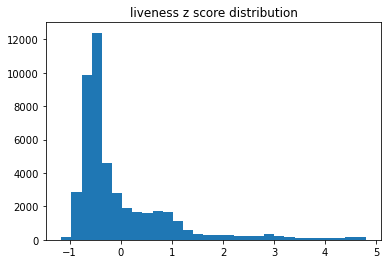

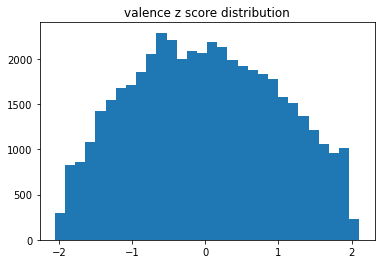

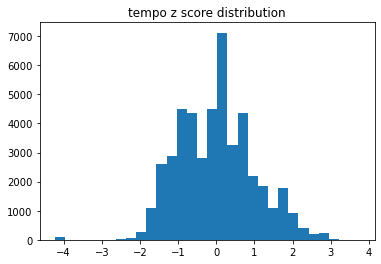

In [57]:
for cont_feature in continuous_features:
    z_feature = cont_feature + "_z"
    plt.title(cont_feature + " z score distribution")
    plt.hist(recent_tracks_z_scores[z_feature], bins=30)
    plt.show()

In [63]:
recent_tracks['season'].value_counts()

AUTUMN    13572
WINTER    12995
SUMMER    10498
SPRING     9604
Name: season, dtype: int64